# Loan Data from Prosper
## by Huong Huynh

## Introduction

I chose the dataset “Loan Data from Prosper” which contains all information about the loan itself and its borrower data. There are 81 attributes and 113,937 loan records. The main focus of this project is to summarize and understand the relationship of variables have impact on the borrower APR using data cleaning and visualization. 

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [202]:
loans=pd.read_csv('C:\\Users\\clair\\Desktop\\Udacity\\Data visualization\\prosperLoanData.csv')

In [203]:
loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [204]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [205]:
loans.shape

(113937, 81)

### What is the structure of your dataset?

There are 113937 records of loan and 81 variables that provide detail for each of the loan record.

### What is/are the main feature(s) of interest in your dataset?

I'm interested about the Borrower APR.<br>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To find the relationship between Borrower APR with other variables. I select occupation, stated monthly income, Prosper score, Prosper rating, employment status, and loan original amount.

## Univariate Exploration

### BorrowerRate and BorrowerAPR

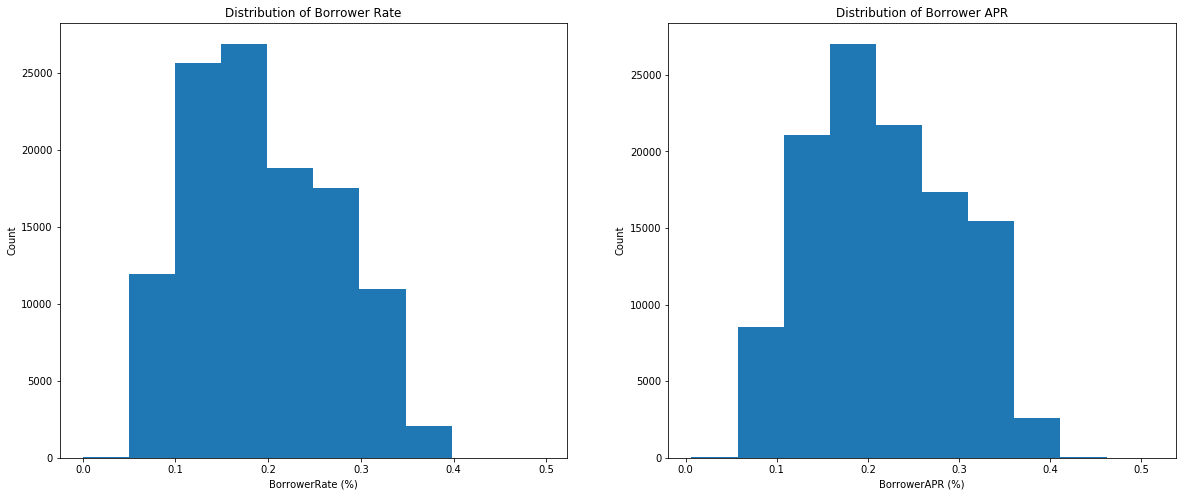

In [206]:
plt.figure(figsize = [20, 8]) 
# Create the first subplot 
plt.subplot(1, 2, 1)
plt.hist(data=loans,x='BorrowerRate')
# Set x,y label and title
plt.xlabel('BorrowerRate (%)')
plt.ylabel('Count')
plt.title('Distribution of Borrower Rate')
# Create the second subplot
plt.subplot(1, 2, 2)
plt.hist(data=loans,x='BorrowerAPR')
# Set x,y label and title
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR');

The Borrower APR rate seems little bit higher than the Borrower interest rate because of the associated fee with the loan. 

In [207]:
loans.ProsperScore.unique()

array([nan,  7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [208]:
MissingScore=len(loans.loc[loans.ProsperScore.isnull()])
MissingScore

29084

In [209]:
MissingScore/loans.shape[0]*100

25.52638738952228

In [210]:
InvalidScore=len(loans[loans.ProsperScore==11])

In [211]:
InvalidScore/loans.shape[0]*100

1.2778991899031922

ProsperScore is a custom risk score built using historical Prosper  data. The score ranges from 1-10, with 10 being the best, or lowest  risk score. We see there are 25% of the data has null value and there is 1% of the data having invalid value of 11.

In [212]:
ValidLoan= loans.loc[loans['ProsperScore'] <11]

In [213]:
ValidLoan.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
1.0       992
Name: ProsperScore, dtype: int64

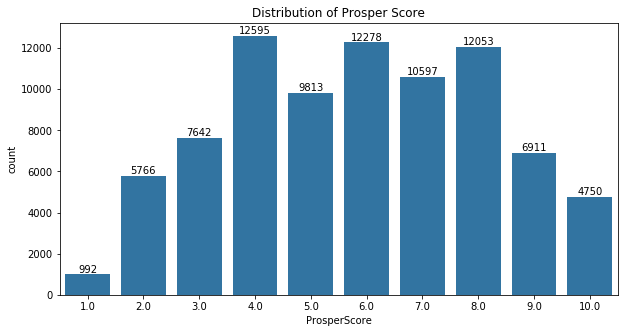

In [214]:
# Set the size of the figure
plt.figure(figsize = [10, 5]) 
# Set color for the plot
base_color=sns.color_palette()[0]
g=sns.countplot(data=ValidLoan,x='ProsperScore',color=base_color)
for bar in g.patches: 
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    g.annotate(format(bar.get_height()),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 5), 
                   textcoords='offset points') 
plt.title('Distribution of Prosper Score');

In [215]:
ValidLoan.shape

(83397, 81)

### Listing Categories

ListingCategory is the category of listing. Prosper uses numeric  values to represent the categories.

In [216]:
ValidLoan['ListingCategory (numeric)'].value_counts()

1     52240
7      9122
2      6647
3      5205
6      2203
13     1967
15     1493
18      868
14      857
20      755
19      754
16      303
5       274
11      212
8       191
10       91
9        85
12       59
17       51
0        20
Name: ListingCategory (numeric), dtype: int64

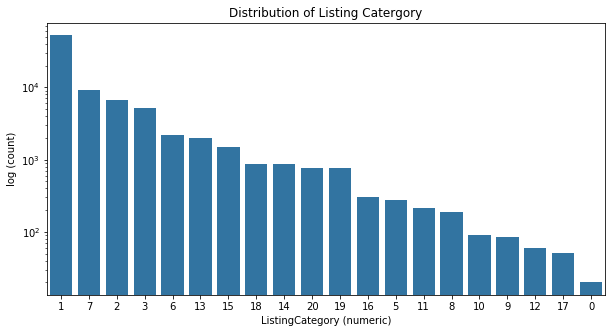

In [217]:
# Set the figure's size
plt.figure(figsize = [10, 5]) 
cat_order= ValidLoan['ListingCategory (numeric)'].value_counts().index
sns.countplot(data=ValidLoan, x='ListingCategory (numeric)',color=base_color,order=cat_order)
# Set x,y label and title
plt.yscale('log')
plt.ylabel('log (count)')
plt.title('Distribution of Listing Catergory');

The Listing Category that were most used is '1' : Debt Consolidation. <br> The second popular option is '7': Other. <br> The third popular service is '2': Home improvement. <br> The fourth popualar service is '3': Business. 

### Loan Status

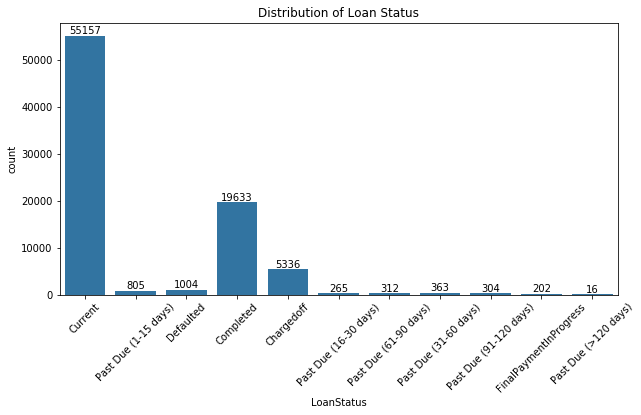

In [218]:
plt.figure(figsize = [10, 5]) 
ax=sns.countplot(data=ValidLoan, x='LoanStatus',color=base_color)
plt.xticks(rotation=45)
for bar in ax.patches:  
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    ax.annotate(format(bar.get_height()),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 5), 
                   textcoords='offset points') 
plt.title('Distribution of Loan Status');

The current loan status already contains half of the data set. However, we current loan does not give us insight of whether it will be completed or defaulted.

### Occupation

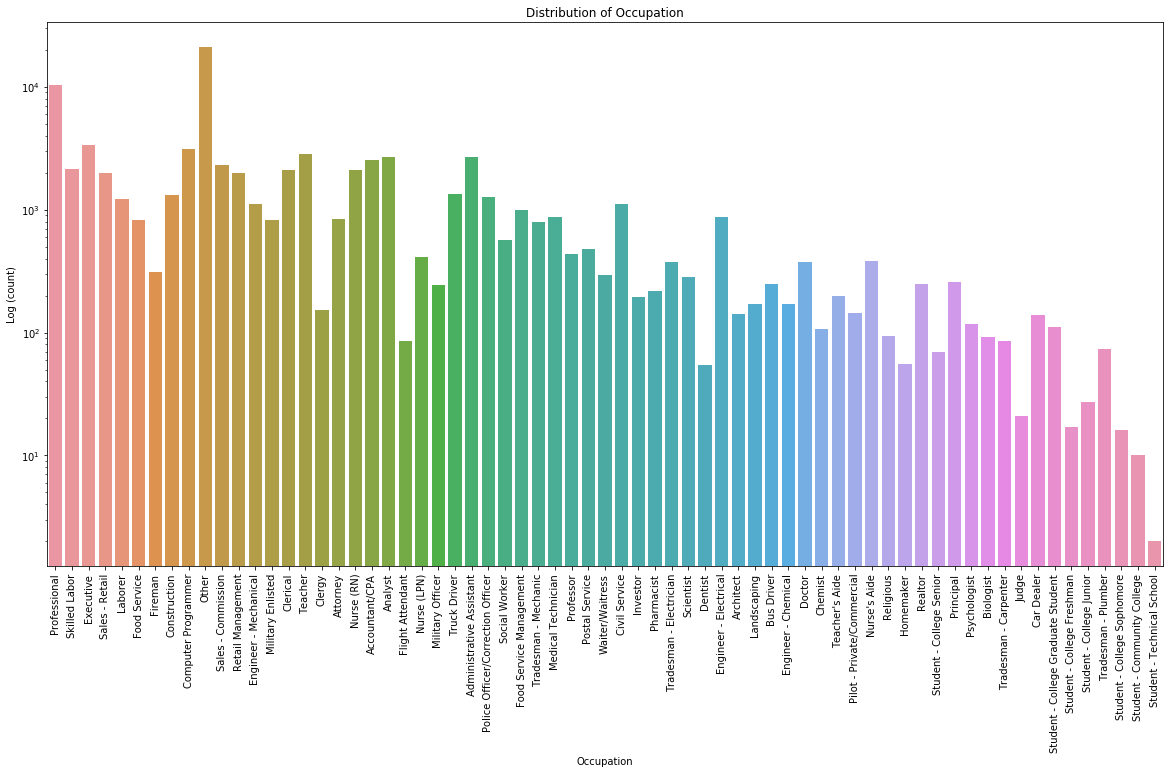

In [219]:
plt.figure(figsize = [20, 10]) 
sns.countplot(data=ValidLoan, x='Occupation')
plt.yscale('log')
# Set the tick label to be rotated
plt.xticks(rotation = 90)
plt.ylabel('Log (count)')
plt.title('Distribution of Occupation');

'Other' and 'Professional' value do not bring much insight on where the borrower's income source generate from. So I decided to remove those two values to get more clear insight on the occupation variable.

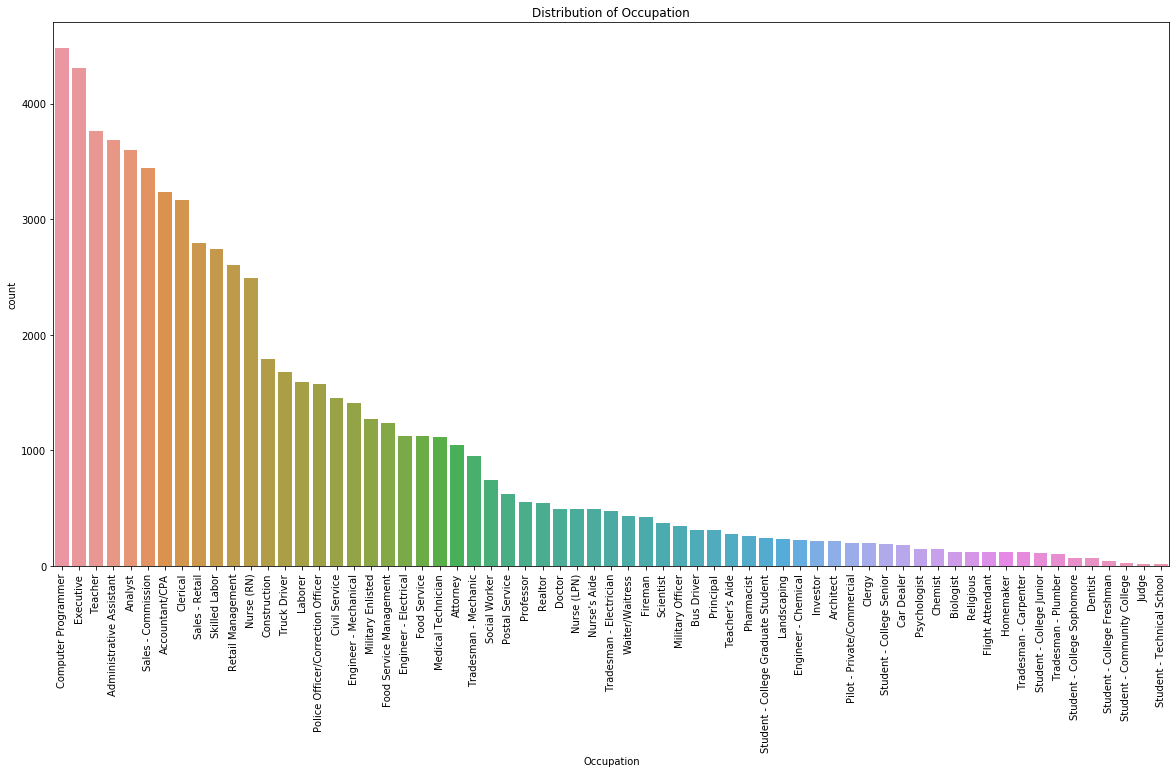

In [220]:
loans_newOc= loans.loc[(loans['Occupation'] != 'Other') & (loans['Occupation'] != 'Professional')]
plt.figure(figsize = [20, 10]) 
occupation_order= loans_newOc['Occupation'].value_counts().index
sns.countplot(data=loans_newOc, x='Occupation',order=occupation_order)
# Set the tick label to be rotated
plt.xticks(rotation = 90)
plt.title('Distribution of Occupation');

After removing 'Other' and 'Professional' value in Occupation variable, we got the top 3 occupation which has the highest frequencies to take a loan are 'Computer Programmer','Executive' and 'Teacher'. I think it is a fun fact that Computer Programmer appears to be the most prevalent occupation that has loan record. 

### StatedMonthlyIncome

In [221]:
ValidLoan.StatedMonthlyIncome.describe()

count    8.339700e+04
mean     5.880222e+03
std      8.271991e+03
min      0.000000e+00
25%      3.416667e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

The maximum of Borrowe MonthlyIncom is $1,750,003 which is pretty high and this could make the shape of data distribution skew to the right. This could caused by the outlier.

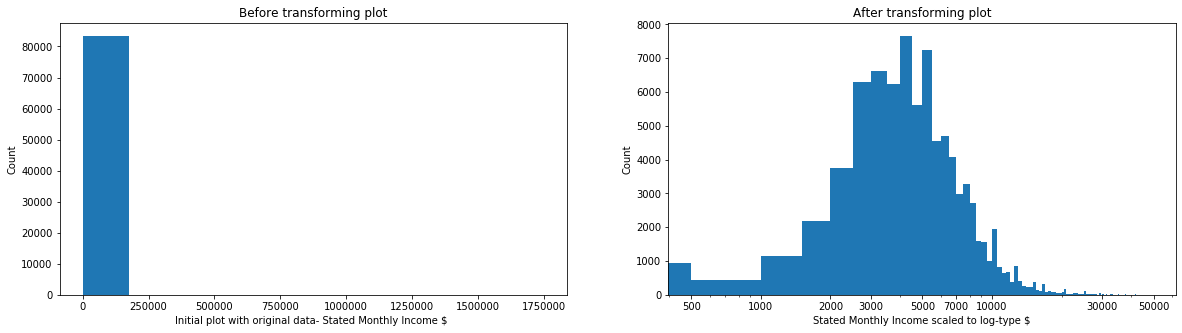

In [222]:
plt.figure(figsize=[20,5])
plt.subplot(1, 2, 1)
plt.hist(data = ValidLoan, x = 'StatedMonthlyIncome');
plt.xlabel('Initial plot with original data- Stated Monthly Income $ ')
plt.ylabel('Count')
plt.title('Before transforming plot')
plt.subplot(1, 2, 2)
bins = np.arange(0, 50000, 500)
plt.hist(data = ValidLoan, x = 'StatedMonthlyIncome', bins=bins)
plt.xscale('log')
ticks = [500, 1000,2000,3000, 5000,7000,10000,30000, 50000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks,labels)
plt.xlabel('Stated Monthly Income scaled to log-type $')
plt.ylabel('Count')
plt.title('After transforming plot');

The majority of borrowers' monthly income is around 2k to 7k. Most of the income are under 30k per month.<br>
Let's look at the monthly income range more than 100k.

In [223]:
ValidLoan[ValidLoan.StatedMonthlyIncome >1e5][['StatedMonthlyIncome','IncomeVerifiable','LoanStatus','LoanOriginalAmount','BorrowerAPR','ProsperRating (Alpha)','ProsperScore']]

,StatedMonthlyIncome,IncomeVerifiable,LoanStatus,LoanOriginalAmount,BorrowerAPR,ProsperRating (Alpha),ProsperScore
8066,4.166667e+05,True,Completed,2000,0.35643,HR,4.0
17411,4.833333e+05,True,Completed,7500,0.35643,E,5.0
35218,1.083333e+05,False,Completed,1000,0.07389,AA,10.0
45028,1.500000e+05,False,Current,4000,0.33973,E,2.0
53014,6.185478e+05,False,Completed,4000,0.25785,D,3.0
53167,1.750003e+06,False,Current,4000,0.35797,HR,4.0
57133,4.666667e+05,True,Current,4000,0.35643,E,5.0
59298,1.208333e+05,False,Current,15000,0.24246,C,6.0
80075,1.583333e+05,True,Current,25000,0.20217,C,6.0
82831,2.500000e+05,False,Current,4000,0.31012,E,3.0


Column 'IncomeVerifiable' is used to quantify whether the stated monthly income is overstated. 'False' indicates borrower did not have required documents supporting their listed income. We can remove these False value as outliers of the data. Looking the histogram, we can see the majority of data records is below 30k. Therefore, those stated monthly income above 30k are considered as outliers.

In [224]:
print ('The percentage of people with income less than 30k :', "{:.2f}".format ((len(loans[loans.StatedMonthlyIncome > 30000])/loans.shape[0])*100),'(%)')

The percentage of people with income less than 30k : 0.29 (%)


I will remove those outliers since they only represent 0.29 % of the total dataset. 

In [225]:
loans_new1= ValidLoan[ValidLoan.StatedMonthlyIncome <30000]

This is the dataset that only contains StatedMonthlyIncome less than 30k

In [226]:
loans_new1.shape

(83145, 81)

### LoanOrginalAmount

In [227]:
loans_new1.LoanOriginalAmount.describe()

count    83145.000000
mean      8962.364580
std       6182.563684
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

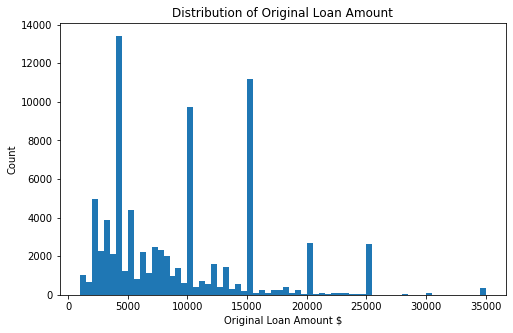

In [228]:
plt.figure(figsize=[8,5])
bins=np.arange(1000,loans_new1['LoanOriginalAmount'].max()+500,500)
plt.hist(data=loans_new1,x='LoanOriginalAmount',bins=bins)
plt.xlabel('Original Loan Amount $')
plt.ylabel('Count')
plt.title('Distribution of Original Loan Amount');

There are high peak around 4k to 6k, 10k, 15k, 20k and 25k. Seventy five percent of the loans are smaller than 12k. 

### ProsperRating and Employment

Convert <b>ProsperRating</b> and <b>Employment</b> to categorical order

In [229]:
# Convert ProsperRating and Employment to categorical order
ordinal_var_dict = {'ProsperRating (Alpha)':['HR','E','D','C','B','A','AA'],
                    'EmploymentStatus':['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
                   }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var_dict[var])
    loans_new1[var] = loans_new1[var].astype(ordered_var)

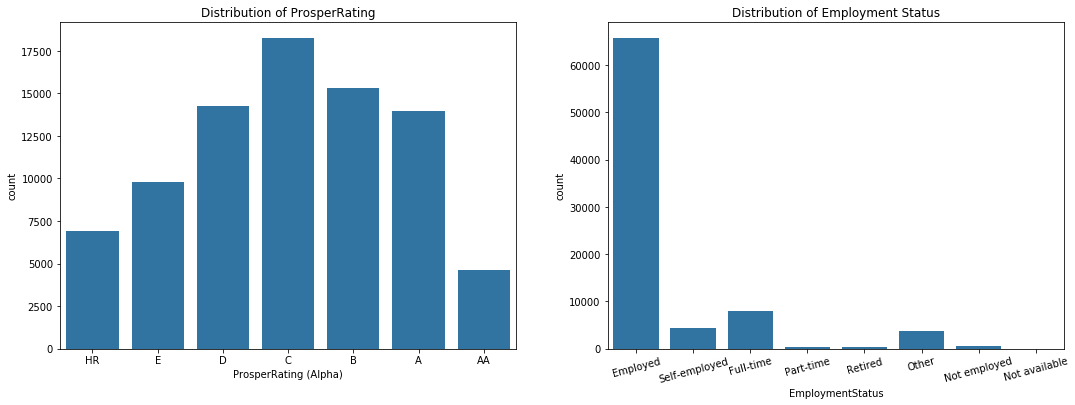

In [230]:
plt.figure(figsize = [18, 6])
plt.subplot(1, 2, 1)
sns.countplot(data = loans_new1, x = 'ProsperRating (Alpha)', color = base_color).set_title('Distribution of ProsperRating')
plt.subplot(1, 2, 2)
sns.countplot(data = loans_new1, x = 'EmploymentStatus', color = base_color).set_title('Distribution of Employment Status')
plt.xticks(rotation=15)
plt.show()

Most of the rating is between D to A. Majority of borrowers are employed and Full-time. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of Borrower APR seems multmodal. There is not unusual points. I did not need to do any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There are outliers in StatedMonthlyIncome column. The maximum value makes the distribution extremely skewed to the right. I performed log transformation on the monthly income amount. Also these outliers need to be removed for further investigation.

## Bivariate Exploration

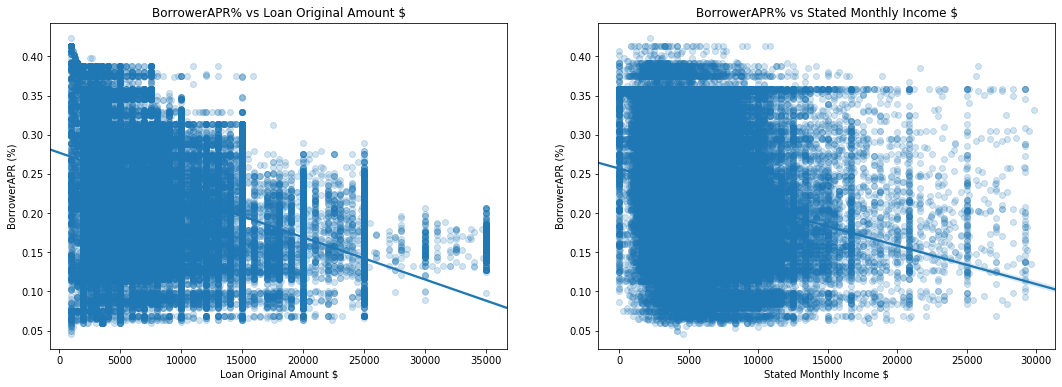

In [231]:
plt.figure(figsize = [18, 6])

plt.subplot(1, 2, 1)
sns.regplot(data = loans_new1, x = 'LoanOriginalAmount', y = 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':1/5}).set_title('BorrowerAPR% vs Loan Original Amount $')
plt.ylabel('BorrowerAPR (%)')
plt.xlabel('Loan Original Amount $');

plt.subplot(1, 2, 2)
sns.regplot(data = loans_new1, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':1/5}).set_title('BorrowerAPR% vs Stated Monthly Income $')
plt.ylabel('BorrowerAPR (%)')
plt.xlabel('Stated Monthly Income $');


Loan Original Amount and Stated Monthly Income do not show there is any relationship between them and BorrowerAPR. <br>
I will try to see if those numeric variables has any impaction on each other.

In [232]:
num_stats=['StatedMonthlyIncome','LoanOriginalAmount','BorrowerAPR']

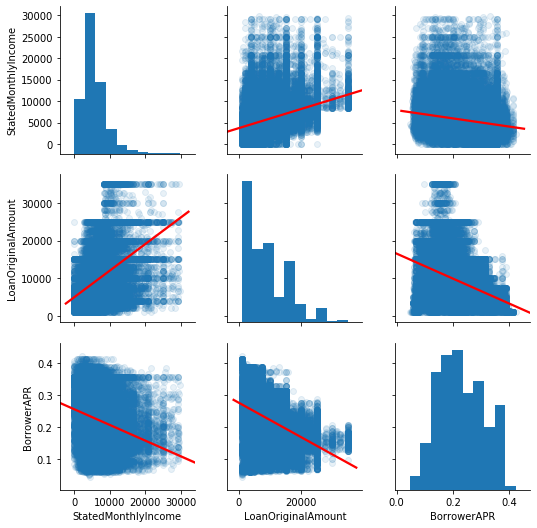

In [233]:
sns.pairplot(data=loans_new1, vars=num_stats,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

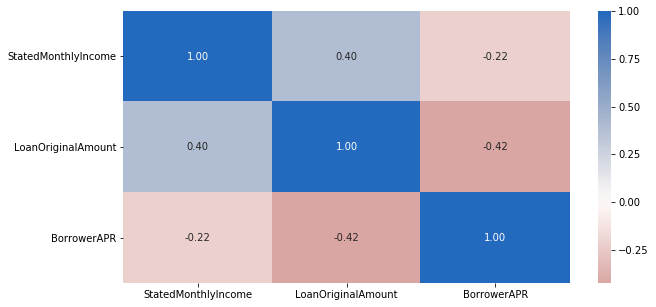

In [234]:
plt.figure(figsize = [10, 5])
ax=sns.heatmap(loans_new1[num_stats].corr(),annot=True,fmt='.2f',center = 0,cmap='vlag_r')
# Set the y-limits of the current axes
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=360);

- The correlation coefficients are not significant enough to illustrate any relationship between those numeric variables.

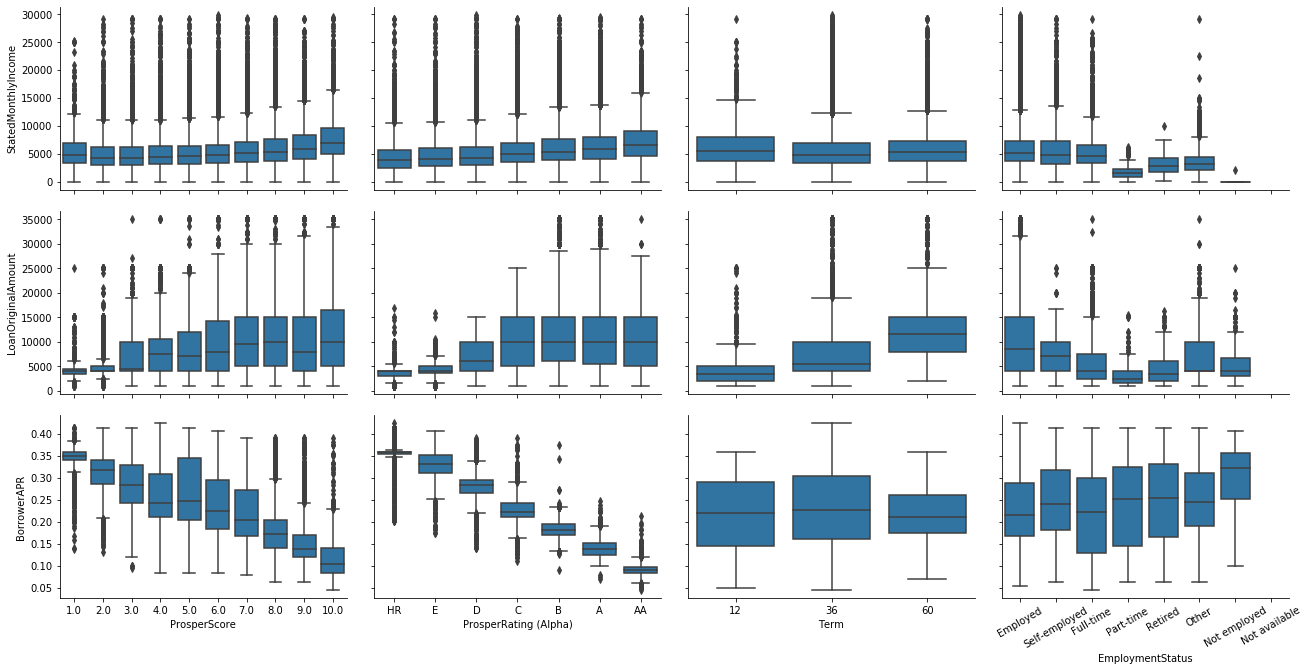

In [235]:
cat_stats=['ProsperScore','ProsperRating (Alpha)','Term','EmploymentStatus']
# plot matrix of numeric features against categorical features
def fixed_boxplot(x,y, **kwargs):
    sns.boxplot(x,y,color=base_color)
g=sns.PairGrid(data=loans_new1,y_vars= num_stats,x_vars= cat_stats,height=3,aspect=1.5)
g.map(fixed_boxplot)
plt.xticks(rotation=30);

- Based on the above figure, we can see that the higher 'Stated Monthly Income' the better ranking in 'Prosper Score' and ' Prosper Rating'. Part time employee, Retired and Unemployed show little income amount. 
- The range of'Loan Original Amount' is also proportionate with 'Prosper Score' and 'Prosper Rating'.
- The rate of 'BorrowerAPR' is inversely proportional to 'Prosper Score' and 'Prosper Rating'. We can see that borrower APR rate is higher in employment group which do not have high stated monthly income. 
- The Loan Original amount shows that increase tendency with the term.

I will investigate relationships between categorical features

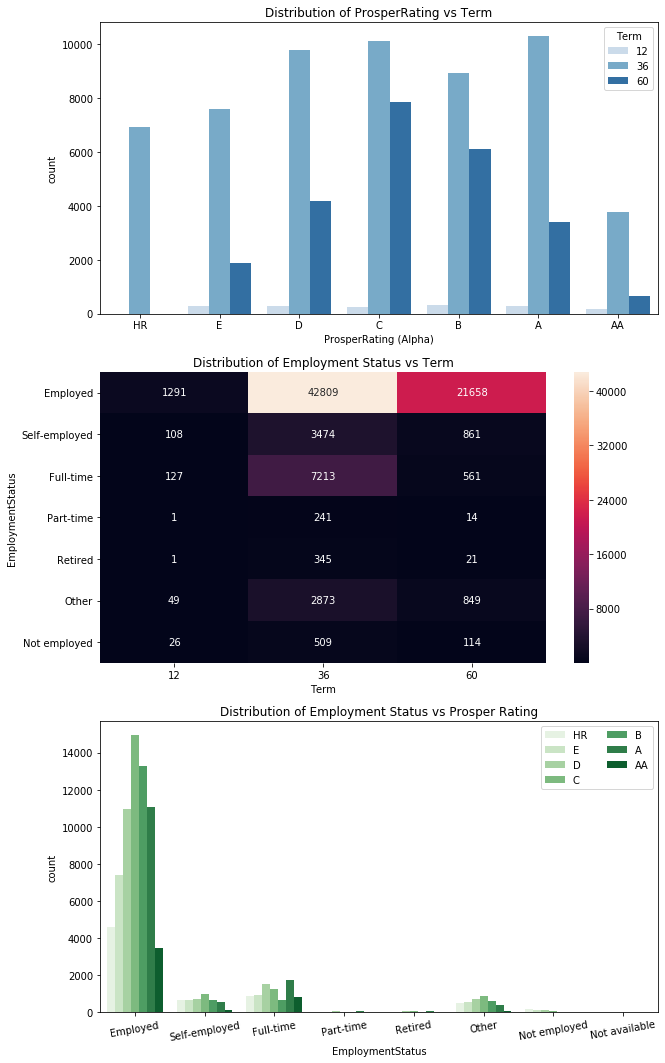

In [236]:
plt.figure(figsize = [10, 10])
plt.subplots_adjust(top=1.5)
plt.subplot(3, 1, 1)
sns.countplot(data = loans_new1, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues').set_title('Distribution of ProsperRating vs Term')

plt.subplot(3, 1, 2)
ct_counts = loans_new1.groupby(['EmploymentStatus', 'Term']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'EmploymentStatus', columns = 'Term', values = 'count')
ax=sns.heatmap(ct_counts, annot = True, fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title('Distribution of Employment Status vs Term')

ax1=plt.subplot(3, 1, 3)
sns.countplot(data = loans_new1, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens').set_title('Distribution of Employment Status vs Prosper Rating')
ax1.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

- 'HR' class in ProsperRating shows it only contains 36 months term loan while other rating has more variety in loan term. Class B and C seems to more prevalent among the other ratings. People tends to have long term loan more than a year.
- 'Full time' and 'Employed' are the majority of people who take loans. It might be based on the risk assessment which only people who has constant income source can meet. 
- The term 36 months seems to be the most selected option regardless of the Employment status.
- 'Part- time', 'Retired', and 'Not Employed' do not have information on any Prosper rating. It could due to the conditions that they can't match in order to be qualified for a loan. 




### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- 'LoanOriginalAmount' and 'StatedMonthlyIncome' do not show any significant relationship with 'BorrowerAPR'. 
- The rate of 'BorrowerAPR' is inversely proportional to 'ProsperScore' and 'ProsperRating (Alpha)'. The higher the borrower APR rate, the lower monthly income of the borrower.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Both 'StatedMonthlyIncome' and 'LoanOriginalAmount' are positively correlated with 'ProsperScore' and 'ProsperRating (Alpha)'.<br>
- The 'LoanOriginalAmount' is proportional to the loan 'Term' .

## Multivariate Exploration

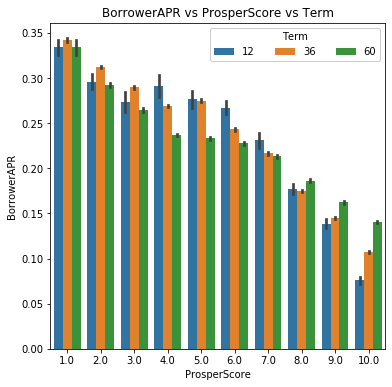

In [237]:
plt.figure(figsize=[6,6])
ax = sns.barplot(data = loans_new1, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'Term')
ax.set_title('BorrowerAPR vs ProsperScore vs Term');
ax.legend(ncol = 3, framealpha = 1, title = 'Term');

- The APR rate slowly drops when the Score increases. The best score borrower has highest APR rate in term of 60 months compared to other terms. We can see the change in APR rate of 60 months loan decrease slowlier than it is in 12 months or 36 months.    
- The best APR rate for borrower with the least risk is when their loan is 12 months. 
- Borrower with risk assessment score at 7 has similar APR rate within 36 months and 60 months. However, borrower in tier 8 for Prosper Score, their APR for 12 months and 36 months is almost the same. 

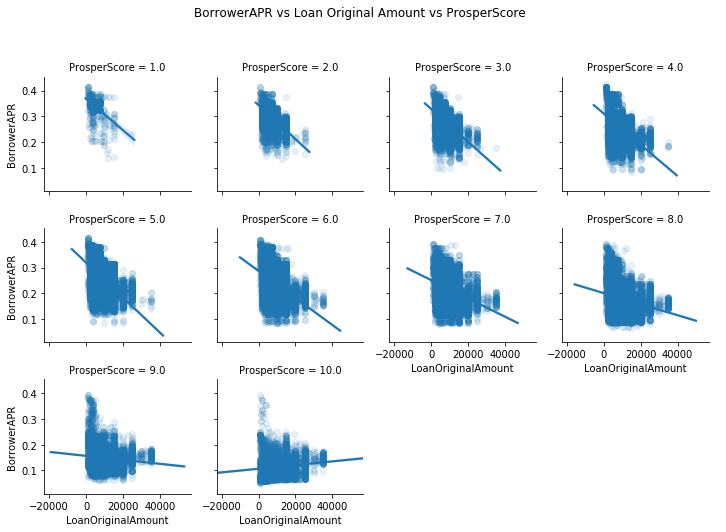

In [238]:
g = sns.FacetGrid(data = loans_new1, col ='ProsperScore', size = 2.5,
                margin_titles = True,col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
g.fig.suptitle('BorrowerAPR vs Loan Original Amount vs ProsperScore')
# Adjust subplots so that titles don't overlap
g.fig.subplots_adjust( top = 0.85 ) ;

- Borrowers with the better score tends to have bigger loan amount with lower APR rate.
- APR rate decreases with better score.
- The relationship between APR and Loan amount turns from negative to slightly positive when the rating at score 10. 


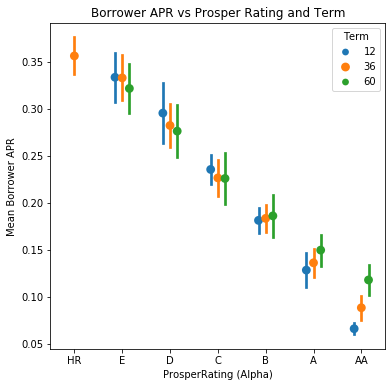

In [239]:
plt.figure(figsize=[6,6])
ax = sns.pointplot(data = loans_new1, y = 'BorrowerAPR', x = 'ProsperRating (Alpha)', hue = 'Term',
                  dodge = 0.3, linestyles = "",ci='sd')
plt.title('Borrower APR vs Prosper Rating and Term')
plt.ylabel('Mean Borrower APR');

- Borrowers with the better rating has lower APR rate and they prefer longer term.
- HR group seems to have their loan in 36 months.
- The best group in rating AA has their lowest APR rate when their loan is in 12 months.
- Group B to AA has the best offer for APR rating if their borrowing term is 1 year in comparision with 3 years and 5 years.

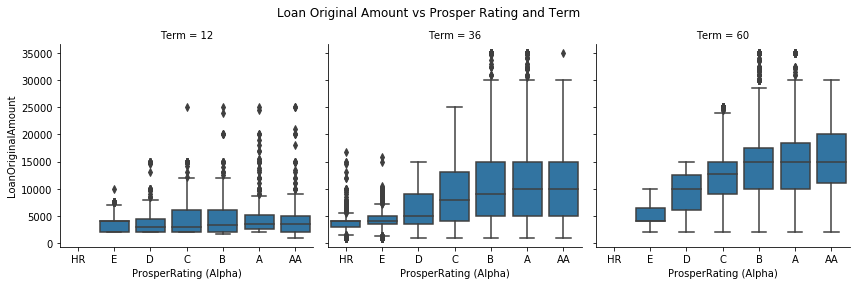

In [240]:
g = sns.FacetGrid(data = loans_new1, col = 'Term', size = 4)
g.map(sns.boxplot, 'ProsperRating (Alpha)', 'LoanOriginalAmount')
g.fig.suptitle('Loan Original Amount vs Prosper Rating and Term')
# Adjust subplots so that titles don't overlap 
g.fig.subplots_adjust( top = 0.85 );

- Similar with Prosper Score, borrowers with the better rating tends to have bigger loan amount with longer term.
- Loan amount increases in longer terms.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Proper Score and Proper Rating are used to compare with Borrower APR rate with the different Term. The impact of Proper Score and Rating has the inverse trend with APR rating.  <br>
- The bigger amount of loan goes with the better Prosper Rating. This makes sense in reality because the lesser the risk, the more money you can borrow from.
### Were there any interesting or surprising interactions between features?

- Surprisingly, the term within each borrower tier changes the dynamic of the APR. For  example, Score measure from 1 to 7 shows shorter term has higher APR rate while the score from 8 to 10 shows the oposite way. Similar to the Proper Score, the same relationship found within Term, Prosper Rating and Borrower APR.